In [1]:
#Brían Ó Fearraigh,  Rodrigo G. Ruiz

import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual, Output
import ipywidgets as widgets
import IPython
from IPython.display import clear_output, display
from array import array
from ctypes import string_at


import matplotlib.mlab as mlab
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
%precision 6

'%.6f'

# Energy Spectrum of Single Muons

From APP 25 (2006) 1-13, the energy spectrum of the muons which reach the detector is separated for single muons and muon bundles. The energy loss processes per unit depth $X = h/cos\theta$ is described in terms of the sum of continuous energy loss $\alpha$ (different from the one encountered for the lateral spread) and catastrophic energy loss $\beta$:

\begin{equation}
   -  \left \langle \frac{dE(E_{\mu})}{dX}  \right \rangle = \alpha + \beta E_{\mu} \, .
\end{equation}

Assuming a power-law for $X$, the expected energy distribution is written as:

\begin{equation}
    \frac{dN}{d(\log_{10}E_{\mu})} = G \cdot E_{\mu} e^{\beta X (1 - \gamma)} [E_{\mu} + \epsilon(1 + e^{- \beta X})]^{-\gamma} \, ,
\end{equation}
where $\gamma$ is the spectral index of the primary mesons and $\epsilon = \alpha/\beta$. Note that in this context these parameters have no direct physical meaning. The normalization factor is defined as
\begin{equation}
    G(\gamma, \beta, \epsilon) = 2.30 \cdot (\gamma - 1) \cdot \epsilon^{\gamma - 1} \cdot e^{(\gamma - 1) \cdot \beta \cdot X} \cdot (1 - e^{- \beta \cdot X})^{\gamma - 1} \, .
\end{equation}
The units of $\epsilon$ are TeV, $\gamma$ is dimensionless, and the muon energy is in TeV.

## The parameters $\gamma$ and $\epsilon$ 
\begin{equation}
    \gamma = \gamma(h) = \gamma_{0} \cdot \ln(h) + \gamma_{1}
\end{equation}
and
\begin{equation}
    \epsilon = \epsilon(h, \theta) = \epsilon_{0}(h) \cdot \sec \theta + \epsilon_{1}h \, ,
\end{equation}
where
\begin{equation}
    \epsilon_{0}(h) = \epsilon_{0a} \cdot e^{\epsilon_{0b} \cdot h} \, ,
\end{equation}

\begin{equation}
    \epsilon_{1}(h) =  \epsilon_{1a} \cdot h + \epsilon_{1b} \, .
\end{equation}

In [2]:
#K parameters - flux #########################

K_0a = 0.0072
K_0b = -1.927
K_1a = -0.581
K_1b = 0.034


def K_0(h, K_0a, K_0b):
    return K_0a * h**(K_0b)

def K_1(h, K_1a, K_1b):
    return K_1a * h + K_1b

def K(h, theta, K_0a, K_0b, K_1a, K_1b):
    return K_0(h, K_0a, K_0b) * np.cos(theta) * np.exp( K_1(h, K_1a, K_1b) * 1./np.cos(theta)  )

In [3]:
beta = 0.420

#only dependent on h
gamma0 = -0.232
gamma1 = 3.961

epsilon0a = 0.0304
epsilon0b = 0.359
epsilon1a = -0.0077
epsilon1b = 0.659

def gamma(h, gamma0, gamma1):
    gamma = gamma0 * np.log(h) + gamma1
    return gamma

def epsilon(h,theta, epsilon0a, epsilon0b, epsilon1a, epsilon1b ):
    epsilon0 = epsilon0a * np.exp(epsilon0b * h)
    epsilon1 = epsilon1a * h + epsilon1b
    epsilon = epsilon0 /np.cos(theta) + epsilon1
    return epsilon

#multiply energy by flux to get the absolute, not differential, energy spectrum
def Spectrum(E , h , theta, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b):
    Gamma = gamma(h, gamma0, gamma1)
    Epsilon = epsilon(h , theta, epsilon0a, epsilon0b, epsilon1a, epsilon1b)
    X = h/np.cos(theta)
    G = 2.30*(Gamma - 1) * np.power(Epsilon , (Gamma - 1)) * np.exp((Gamma - 1) * beta * X) * np.power((1 - np.exp(-beta * X)) , (Gamma - 1))
    Spec = G * E * np.exp(beta * X * (1 - Gamma)) * np.power((E + Epsilon*(1 - np.exp(-beta * X))) , -Gamma)
    Spec*=K(h, theta, K_0a, K_0b, K_1a, K_1b)
    return Spec

In [4]:
Emin = 0.001
Emax = 10
npointsE = 200
deltaE = (Emax-Emin)/npointsE


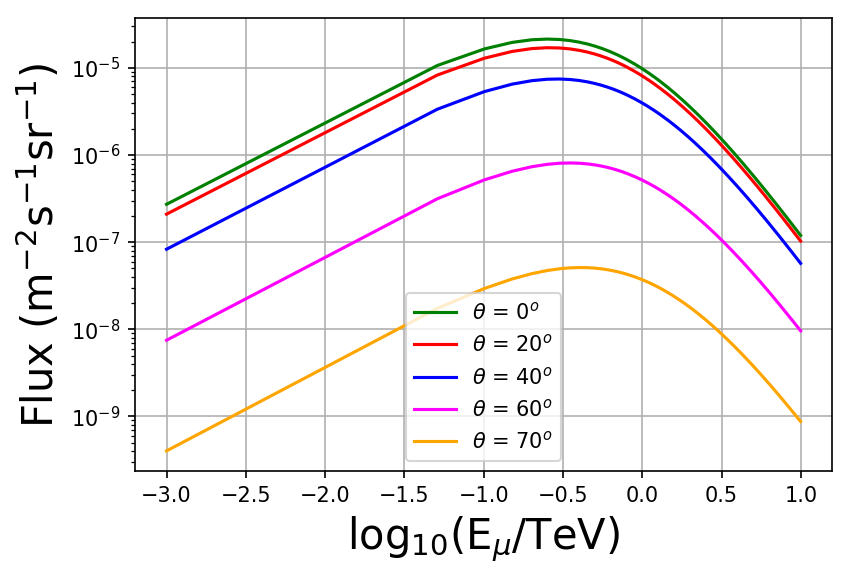

In [7]:
LogEner = []
Ener  = []
Spectrums = []
h  = 4.5
theta = [0 , 20*np.pi/180 , 40*np.pi/180 , 60*np.pi/180 , 70*np.pi/180]
for i in range(len(theta)):
    spectrum = []
    Ens = []
    LogEns = []
    for j in range(npointsE):
        E = Emin + deltaE * j
        Ens.append(E)
        LogEns.append(np.log10(E))
        spectrum.append(Spectrum(E, h ,theta[i], beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b))
    Spectrums.append(spectrum)
    Ener.append(Ens)
    LogEner.append(LogEns)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(LogEner[0], Spectrums[0],'green', label=r'$\theta$ = 0$^o$')
ax.plot(LogEner[1], Spectrums[1],'red', label=r'$\theta$ = 20$^o$')
ax.plot(LogEner[2], Spectrums[2],'blue', label=r'$\theta$ = 40$^o$')
ax.plot(LogEner[3], Spectrums[3],'magenta', label=r'$\theta$ = 60$^o$')
ax.plot(LogEner[4], Spectrums[4],'orange', label=r'$\theta$ = 70$^o$')
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 20)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 20)
plt.grid(True)
ax.set_yscale("log")
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()

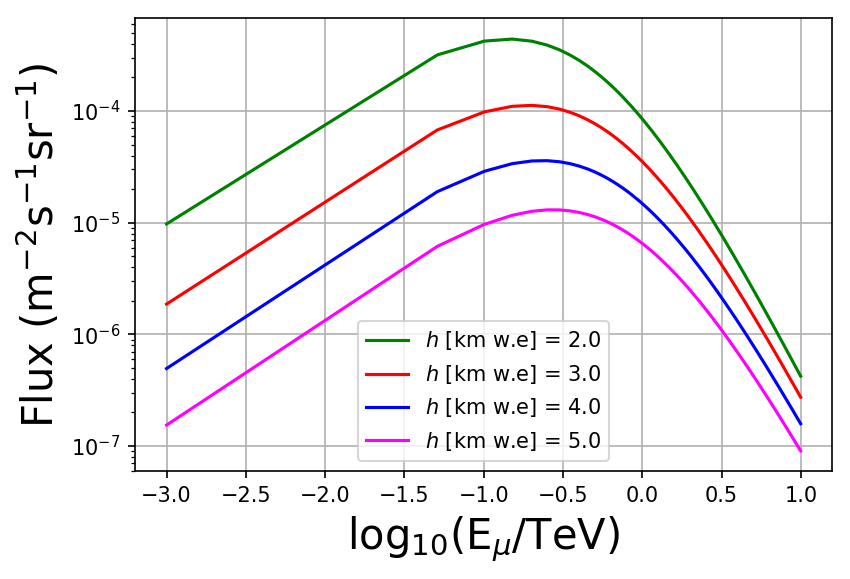

In [6]:
Emin = 0.001
Emax = 10
npointsE = 200
deltaE = (Emax-Emin)/npointsE

LogEner = []
Ener  = []
Spectrums = []
h  = [2.0 , 3.0 , 4.0 , 5.0]
theta = 0.0
for i in range(len(h)):
    spectrum = []
    Ens = []
    LogEns = []
    for j in range(npointsE):
        E = Emin + deltaE * j
        Ens.append(E)
        LogEns.append(np.log10(E))
        spectrum.append(Spectrum(E, h[i] ,theta, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b))
    Spectrums.append(spectrum)
    Ener.append(Ens)
    LogEner.append(LogEns)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(LogEner[0], Spectrums[0],'green',  label=r'$h$ [km w.e] = 2.0')
ax.plot(LogEner[1], Spectrums[1],'red',  label=r'$h$ [km w.e] = 3.0')
ax.plot(LogEner[2], Spectrums[2],'blue',  label=r'$h$ [km w.e] = 4.0')
ax.plot(LogEner[3], Spectrums[3],'magenta',  label=r'$h$ [km w.e] = 5.0')
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 20)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 20)
plt.grid(True)
plt.rcParams['figure.dpi'] = 150
ax.set_yscale("log")
plt.legend()
plt.show()


In [ ]:
zenith_angle = 0
h = 2.785

Energy = np.arange(0.001,10,0.01)

def plot(h, angle):
    plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b) )
    plt.yscale("log")
    plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
    plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
    plt.rcParams['figure.dpi'] = 150
    plt.show()

interactive_plot = interactive(plot, angle=(0,np.pi/2), h=h)

interactive_plot

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'beta: '+ str(beta) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta + 0.3, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'beta: '+ str(beta + 0.3) )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta - 0.3, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'beta: '+ str(beta - 0.3) )
plt.yscale("log")
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'gamma0: '+ str(gamma0) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0 + 0.1, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'gamma0: '+ str(gamma0 + 0.1) )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0 - 0.1, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'gamma0: '+ str(gamma0 - 0.1) )
plt.yscale("log")
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'gamma1: '+ str(gamma1) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1 + 1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'gamma1: '+ str(gamma1 + 1.0) )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1 - 1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'gamma1: '+ str(gamma1 - 1.0) )
plt.yscale("log")
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'epsilon0a: '+ str(epsilon0a) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a + 0.01, epsilon0b, epsilon1a, epsilon1b), label = 'epsilon0a: '+ str(epsilon0a + 0.01) )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a - 0.01, epsilon0b, epsilon1a, epsilon1b), label = 'epsilon0a: '+ str(epsilon0a - 0.01) )
plt.yscale("log")
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'epsilon0b: '+ str(epsilon0b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b + 0.1, epsilon1a, epsilon1b), label = 'epsilon0b: '+ str(epsilon0b + 0.1) )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b - 0.1, epsilon1a, epsilon1b), label = 'epsilon0b: '+ str(epsilon0b - 0.1) )
plt.yscale("log")
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'epsilon1a: '+ str(epsilon0b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a + 0.1, epsilon1b), label = 'epsilon1a: '+ str(epsilon1a + 0.1) )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a - 0.1, epsilon1b), label = 'epsilon1a: '+ str(epsilon1a - 0.1) )
plt.yscale("log")
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b), label = 'epsilon1b: '+ str(epsilon1b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b + 0.3), label = 'epsilon1b: '+ str(epsilon1b + 0.3) )
plt.plot( np.log10(Energy) , Spectrum(Energy, h, zenith_angle, beta, gamma0, gamma1, epsilon0a, epsilon0b, epsilon1a, epsilon1b - 0.3), label = 'epsilon1b: '+ str(epsilon1b - 0.3) )
plt.yscale("log")
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'Flux (m$^{-2}$s$^{-1}$sr$^{-1}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()